In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import textwrap, warnings
import joblib as jb
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv(r"C:\Users\bhupe\Downloads\Customer_churn\Telco-Customer-Churn.csv")

In [64]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [65]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### EDA

In [66]:
data.duplicated().sum()

0

In [67]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [68]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [69]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)

In [70]:
data.dropna(subset = ['TotalCharges'], inplace = True)
data.reset_index(drop = True, inplace = True)

In [71]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

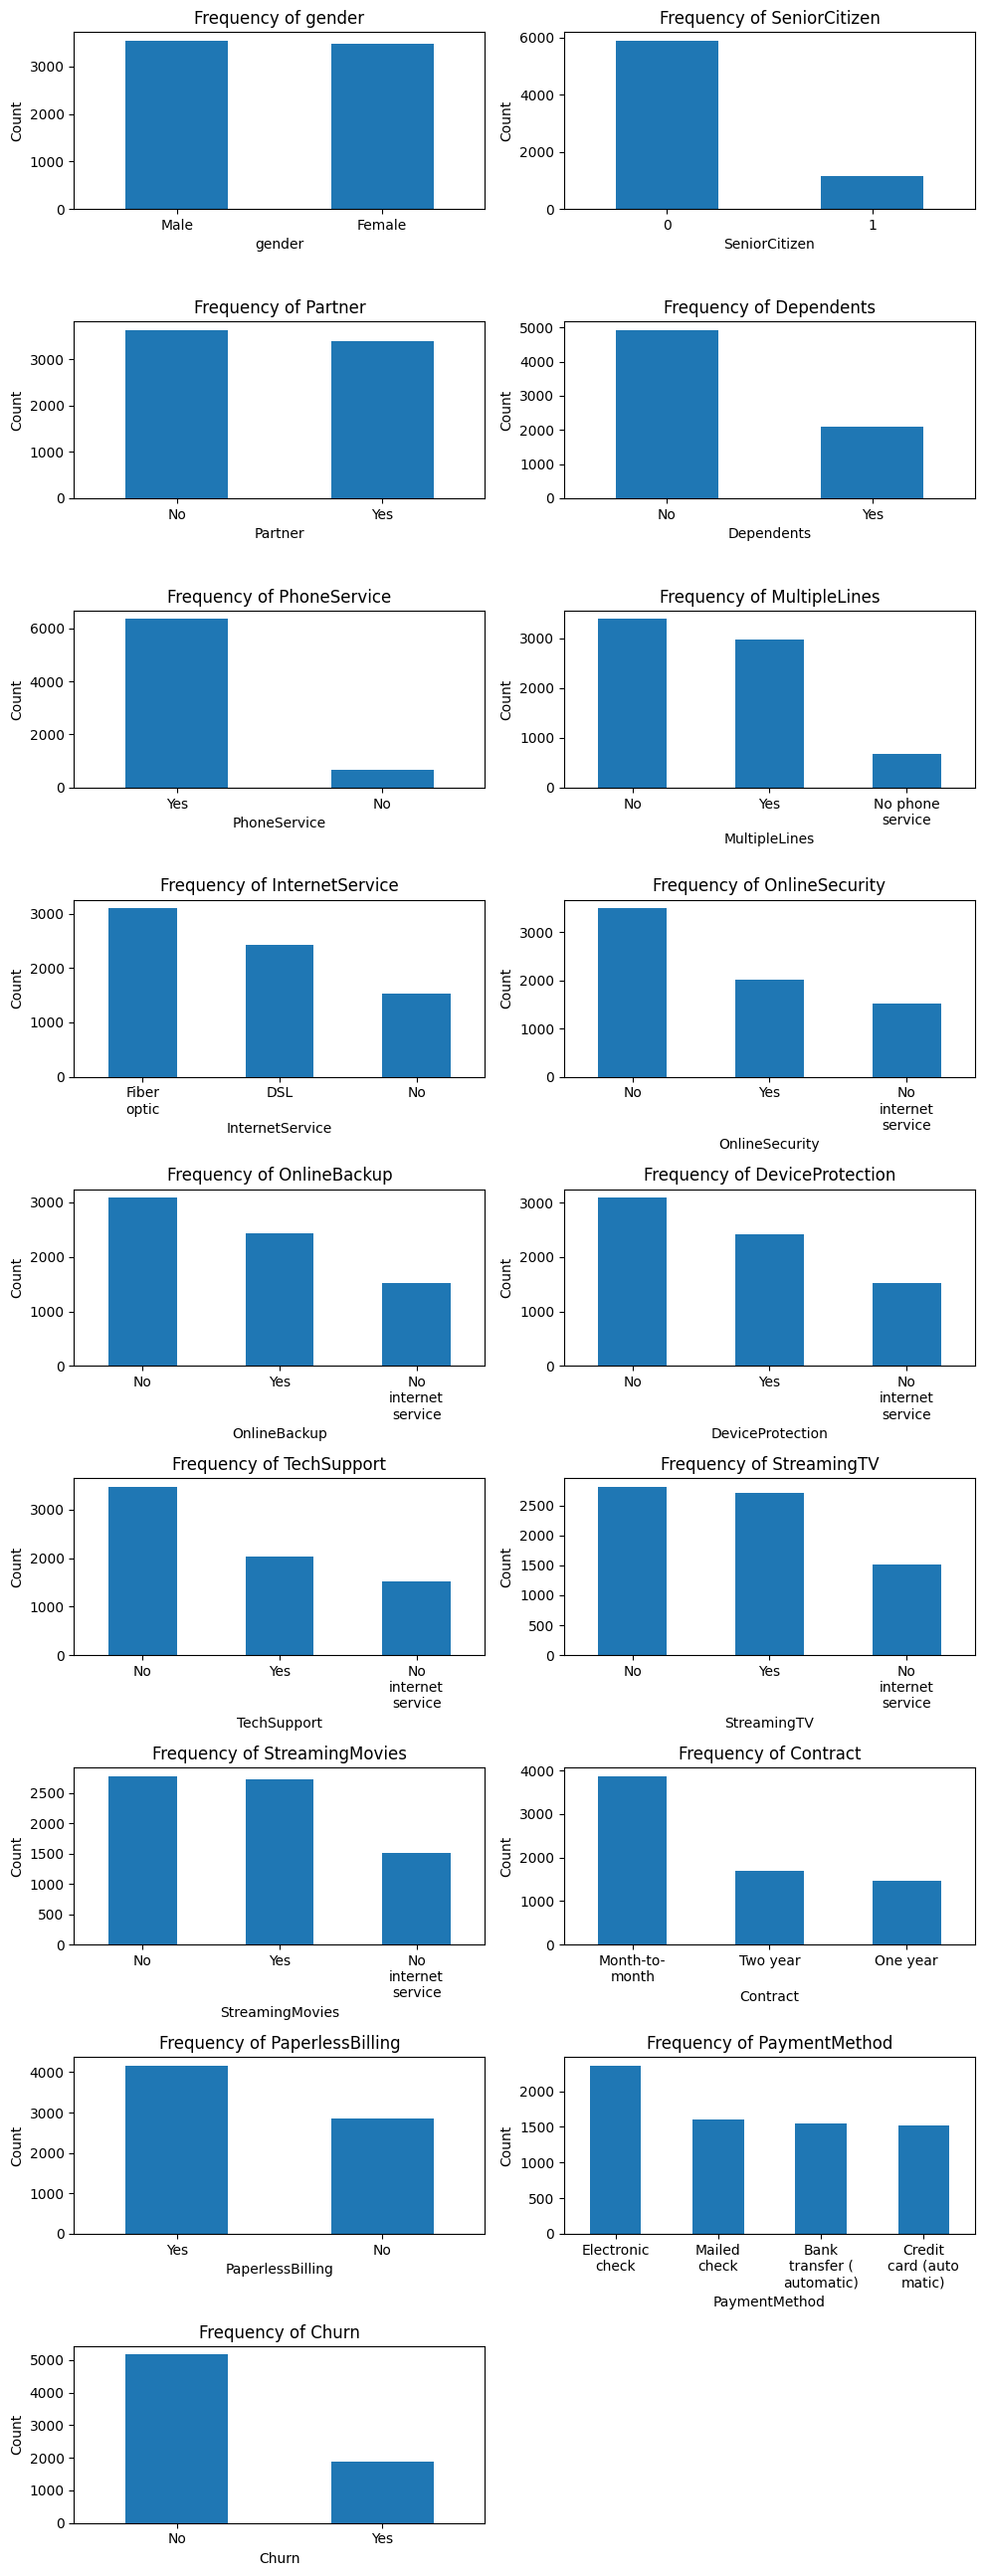

In [72]:
# Columns to plot (excluding ID and numeric column)
cols_to_plot = data.drop(['customerID', 'MonthlyCharges', 'tenure', 'TotalCharges'], axis=1).columns

# Layout: 2 columns
n_cols = 2
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 26))
axes = axes.flatten() # convert 2d array to 1d

# Plot each column
for i, col in enumerate(cols_to_plot):
    data[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Frequency of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)
    # gets the tick labels on the x-axis and extracts the text from each tick
    labels = [tick.get_text() for tick in axes[i].get_xticklabels()]  
    # breaks each label into chunks of max 10 characters
    wrapped_labels = ['\n'.join(textwrap.wrap(label, 10)) for label in labels]
    axes[i].set_xticklabels(wrapped_labels, rotation=0)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()


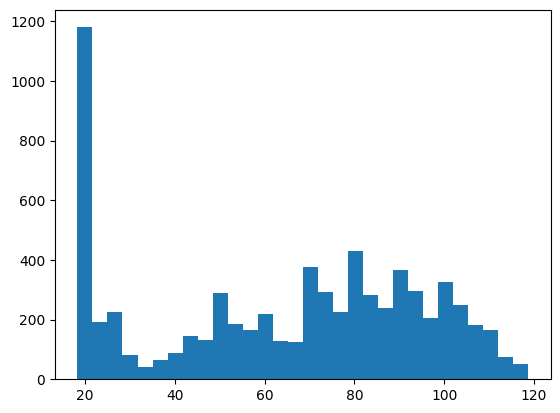

In [73]:
plt.hist(data['MonthlyCharges'], bins = 30);

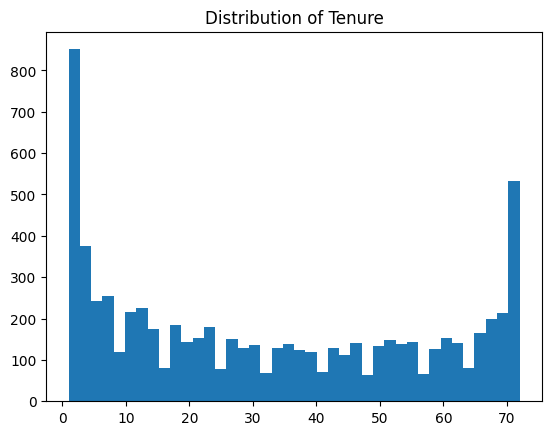

In [74]:
plt.hist(data['tenure'], bins = 40)
plt.title('Distribution of Tenure');

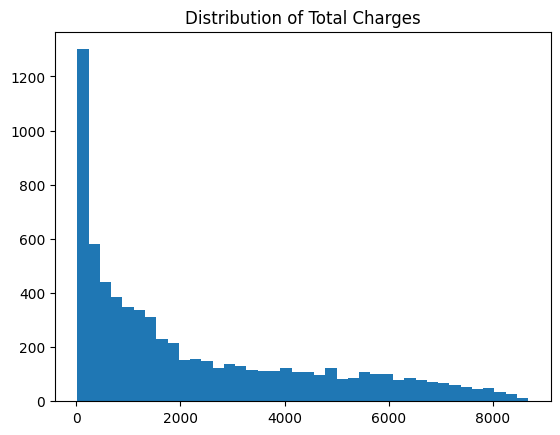

In [75]:
plt.hist(data['TotalCharges'], bins = 40)
plt.title('Distribution of Total Charges');

In [76]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

<Axes: >

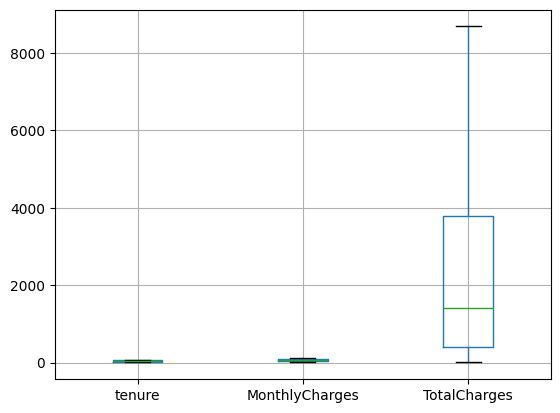

In [77]:
data.drop('SeniorCitizen', axis = 1).boxplot()

In [78]:
data.drop(['customerID'], axis = 1, inplace = True)

In [79]:
num_cols = (data.select_dtypes(['int', 'float']).columns)

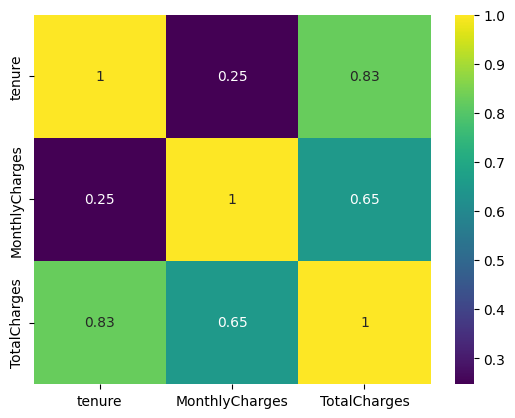

In [80]:
sns.heatmap(data[num_cols].drop('SeniorCitizen', axis = 1).corr(), annot = True, cmap = 'viridis');

In [81]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Feature Engineering

In [82]:
service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]
# sums each service 
data['num_services'] = data[service_cols].apply(
    lambda row: sum(1 for val in row if val == 'Yes'), axis=1
)

In [83]:
data['TotalSpend'] = data['MonthlyCharges'] * data['tenure']
data['AvgSpendPerMonth'] = np.where(data['tenure'] > 0, data['TotalCharges'] / data['tenure'], 0)

In [84]:
contract_map = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
data['Contract'] = data['Contract'].map(contract_map)

In [85]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object' and col != 'Churn']
encoded_cols = pd.get_dummies(data[cat_cols], drop_first = True).astype(int)
final_data = pd.concat([data.drop(cat_cols, axis = 1), encoded_cols], axis=1)

In [86]:
final_data

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,num_services,TotalSpend,AvgSpendPerMonth,gender_Male,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,29.85,29.85,No,1,29.85,29.850000,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,1,56.95,1889.50,No,3,1936.30,55.573529,1,...,0,0,0,0,0,0,0,0,0,1
2,0,2,0,53.85,108.15,Yes,3,107.70,54.075000,1,...,0,0,0,0,0,0,1,0,0,1
3,0,45,1,42.30,1840.75,No,3,1903.50,40.905556,1,...,0,1,0,0,0,0,0,0,0,0
4,0,2,0,70.70,151.65,Yes,1,141.40,75.825000,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,1,84.80,1990.50,No,7,2035.20,82.937500,1,...,0,1,0,1,0,1,1,0,0,1
7028,0,72,1,103.20,7362.90,No,6,7430.40,102.262500,0,...,0,0,0,1,0,1,1,1,0,0
7029,0,11,0,29.60,346.45,No,1,325.60,31.495455,0,...,0,0,0,0,0,0,1,0,1,0
7030,1,4,0,74.40,306.60,Yes,2,297.60,76.650000,1,...,0,0,0,0,0,0,1,0,0,1


### Model Building

In [87]:
x = final_data.drop('Churn', axis=1)
le = LabelEncoder()
y = le.fit_transform(final_data['Churn'])

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [89]:
logr = LogisticRegression(random_state = 42)
logr.fit(x_train, y_train)
y_pred_logr = logr.predict(x_test)
print(f'Logistic Regression Training Accuracy: {logr.score(x_train, y_train)}')
print(f'Logistic Regression Testing Accuracy: {logr.score(x_test, y_test)}')
print(classification_report(y_test, y_pred_logr))

Logistic Regression Training Accuracy: 0.8065777777777777
Logistic Regression Testing Accuracy: 0.798862828713575
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [90]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)
print(f'Random Forest Training Accuracy: {rf.score(x_train, y_train)}')
print(f'Random Forest Testing Accuracy: {rf.score(x_test, y_test)}')

Random Forest Training Accuracy: 0.9987555555555555
Random Forest Testing Accuracy: 0.7867803837953091


In [112]:
from scipy import stats
param_grid_xgb = {
    'n_estimators': stats.randint(100, 500),
    'learning_rate': stats.loguniform(0.01, 1), 
    'max_depth': stats.randint(3, 10),
    'reg_alpha': stats.uniform(0, 1.0),
    'reg_lambda': stats.uniform(0.5, 2.0),
    'scale_pos_weight': stats.uniform(1, 10)  # helpful for imbalanced churn
}
xgb_tune = XGBClassifier(random_state = 42, eval_metric = 'auc')
rs = RandomizedSearchCV(estimator = xgb_tune, param_distributions = param_grid_xgb, cv = 3, 
                        random_state = 42, verbose = 0, n_iter = 20, scoring = 'roc_auc', n_jobs = -1)
rs.fit(x_train, y_train)
print("Best params:", rs.best_params_)
print("Best score:", rs.best_score_)

Best params: {'learning_rate': 0.024985313794028224, 'max_depth': 5, 'n_estimators': 388, 'reg_alpha': 0.6059599747810114, 'reg_lambda': 2.352601757026698, 'scale_pos_weight': 7.510770255019445}
Best score: 0.8475703366055934


In [114]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
xgb = XGBClassifier(random_state = 42, **rs.best_params_)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print(f'XGBOOST Training Accuracy: {xgb.score(x_train, y_train)}')
print(f'XGBOOST Testing Accuracy: {xgb.score(x_test, y_test)}')
print(classification_report(y_test, y_pred_xgb))
y_proba_xgb = xgb.predict_proba(x_test)[:, 1]
auc_score_xgb = roc_auc_score(y_test, y_proba_xgb)
threshold = 0.38
y_pred_custom = (y_proba_xgb >= threshold).astype(int)
print("AUC:", auc_score_xgb)
print(classification_report(y_test, y_pred_custom))

XGBOOST Training Accuracy: 0.7368888888888889
XGBOOST Testing Accuracy: 0.6695095948827292
              precision    recall  f1-score   support

           0       0.93      0.59      0.72      1033
           1       0.44      0.89      0.59       374

    accuracy                           0.67      1407
   macro avg       0.69      0.74      0.66      1407
weighted avg       0.80      0.67      0.69      1407

AUC: 0.8329912357444957
              precision    recall  f1-score   support

           0       0.95      0.50      0.66      1033
           1       0.40      0.93      0.56       374

    accuracy                           0.61      1407
   macro avg       0.68      0.71      0.61      1407
weighted avg       0.80      0.61      0.63      1407



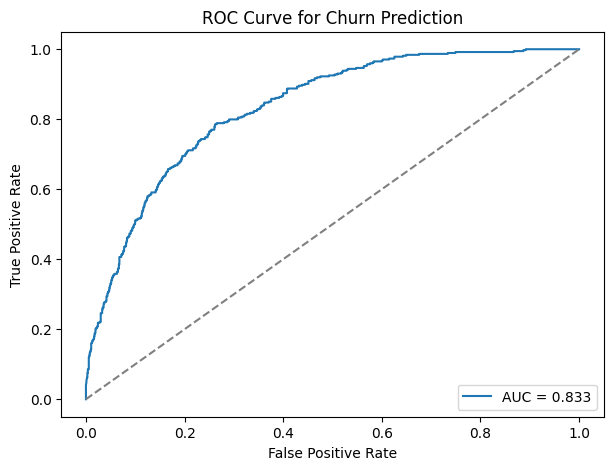

In [116]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score_xgb:.3f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray') 
plt.title('ROC Curve for Churn Prediction')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right');

### PIPELINE

In [34]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
     remainder='passthrough'
)

pipeline_xgb = Pipeline(steps = [
                    ('preprocess', preprocessor),
                    ('model', XGBClassifier(random_state = 42, **rs.best_params_))
])
x1 = data.drop('Churn', axis=1)
le1 = LabelEncoder()
y1 = le1.fit_transform(data['Churn'])
x_train_pipe, x_test_pipe, y_train_pipe, y_test_pipe = train_test_split(x1, y1, test_size = 0.2, 
                                                                        random_state=42, stratify = y1)

pipeline_xgb.fit(x_train_pipe, y_train_pipe)
y_pred_pipe = pipeline_xgb.predict(x_test_pipe)
print(f'XGBOOST Training Accuracy: {pipeline_xgb.score(x_train_pipe, y_train_pipe)}')
print(f'XGBOOST Testing Accuracy: {pipeline_xgb.score(x_test_pipe, y_test_pipe)}')

XGBOOST Training Accuracy: 0.8165333333333333
XGBOOST Testing Accuracy: 0.7960199004975125


In [35]:
# jb.dump(pipeline_xgb, 'E://Models//Customer_churn.pkl')

['E://Models//Customer_churn.pkl']

In [ ]:
# Recall for churn = 0.72 →  catching most of the churners, which is key for retention campaigns.

# Precision for churn = 0.55 → roughly half of flagged churners are false positives, 
#                       but this is often acceptable if contacting customers is cheap.

# Accuracy = 0.80 → good for an imbalanced dataset.

# ROC-AUC = 0.842 → model ranks churners well.

<Figure size 1200x800 with 0 Axes>

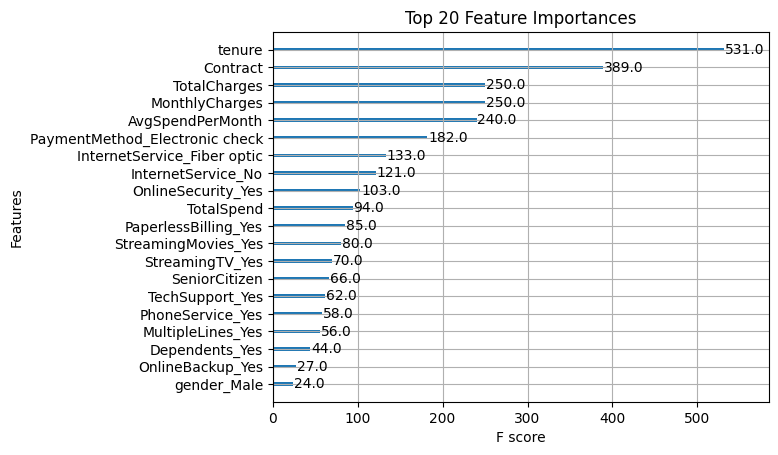

In [40]:
from xgboost import plot_importance
plt.figure(figsize=(12,8))
plot_importance(xgb, max_num_features=20, importance_type='weight')
plt.title("Top 20 Feature Importances")
plt.show()